In [41]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [43]:
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [115]:
df = pd.read_csv('./datasets/netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# Exibindo dados que estão faltando
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

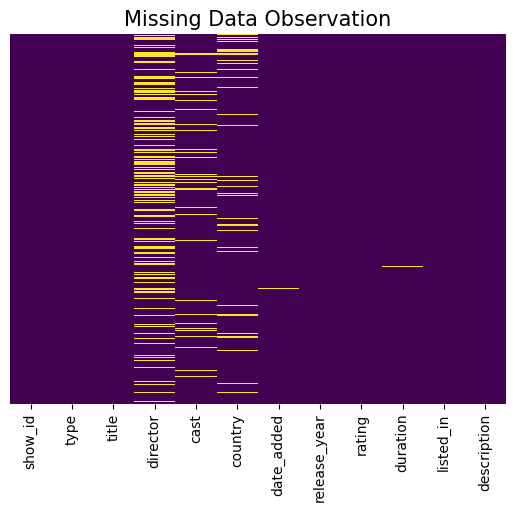

In [9]:
# Exibindo dados que estão faltando
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');
plt.title("Missing Data Observation", fontsize = 15)
plt.show()

In [52]:
# Quantidade de producoes por pais
df
#producoes_por_pais = df['country'].value_counts()
  

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [62]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [83]:
nan_count = df['country'].isna().sum()

df_sem_nan = df.dropna(subset=['country'])
df_sem_nan

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


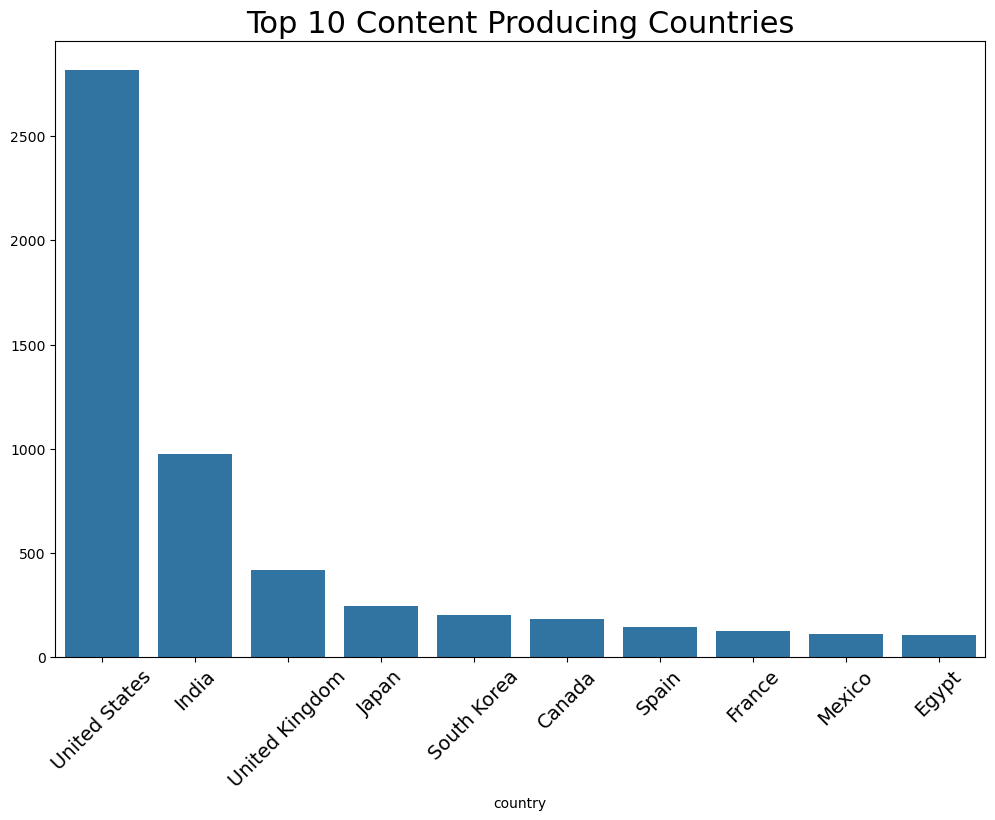

In [35]:
# Quantidade de pais que mais produz
top10_country = df['country'].value_counts().nlargest(10)

plt.figure(figsize = (12,8))
sns.barplot(x = top10_country.index, y = top10_country.values)
plt.title("Top 10 Content Producing Countries", fontsize = 22)
plt.xticks(rotation = 45, fontsize = 14)
plt.show()

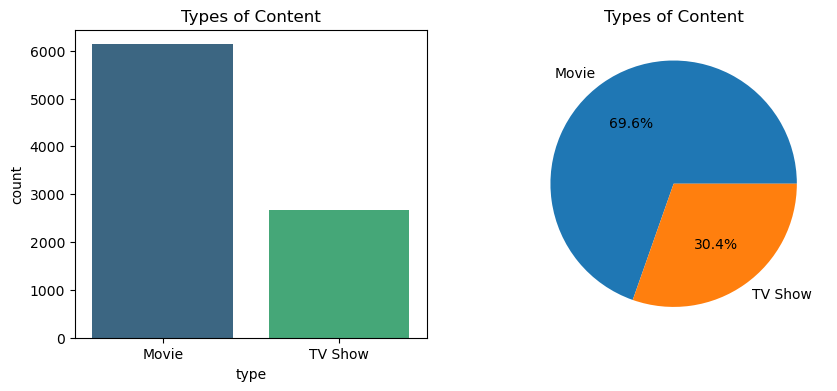

In [11]:
### Quantidade de produção por categoria ###

# Conta o número de ocorrências de cada valor único na coluna 'type' do DataFrame 'df'
type_value = df['type'].value_counts()

# Cria uma figura com 1 linha e 2 colunas de subgráficos, com tamanho 10x4 polegadas
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Cria um gráfico de barras com a contagem de categorias da coluna 'type'
# Usando a paleta de cores 'viridis' e colocando-o no primeiro gráfico (axes[0])
sns.countplot(data=df, x='type', palette='viridis', ax=axes[0])

# Define o título para o gráfico de barras
axes[0].set_title('Types of Content')

# Cria um gráfico de pizza no segundo gráfico (axes[1]) usando a contagem de categorias (type_value)
# A porcentagem de cada fatia é exibida com uma casa decimal
axes[1].pie(type_value, labels=type_value.index, autopct='%1.1f%%')

# Define o título para o gráfico de pizza
axes[1].set_title('Types of Content')

plt.show()


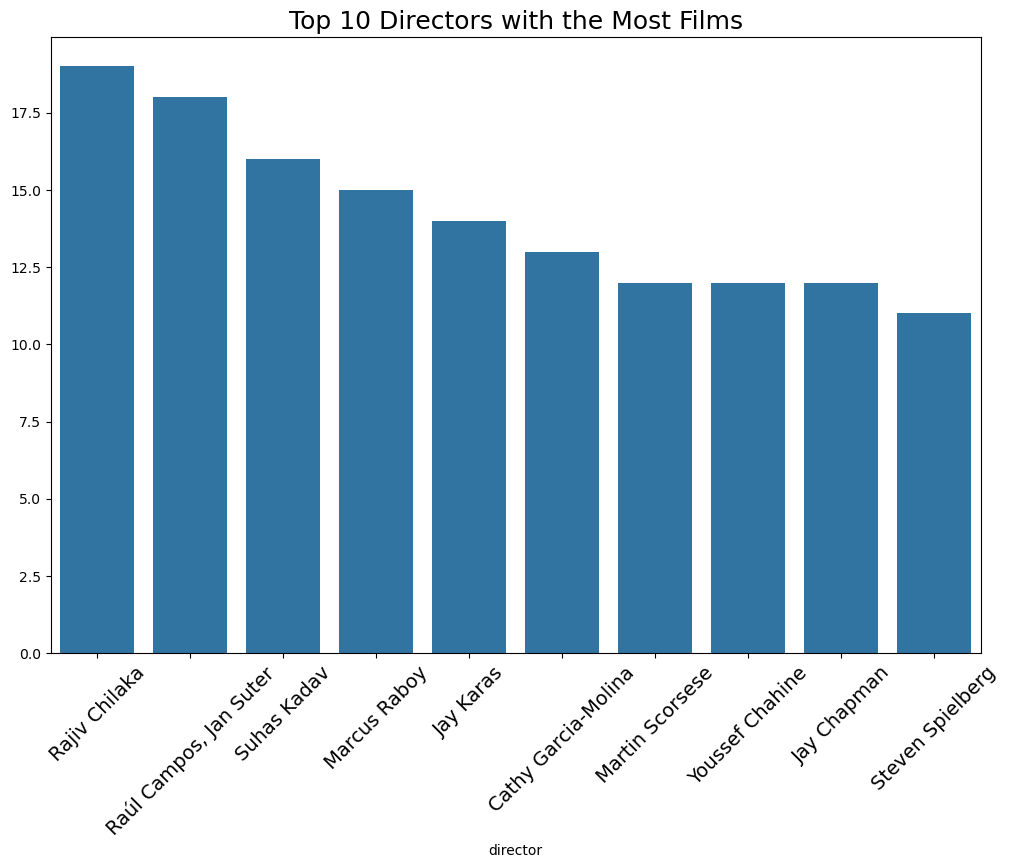

In [17]:
### Top 10 diretores com mais filmes

director_film = df[df["type"] == "Movie"]["director"].value_counts()[:10]

plt.figure(figsize = (12,8))
sns.barplot(x = director_film.index, y = director_film.values)
plt.xticks(rotation = 45, fontsize = 14)
plt.title("Top 10 Directors with the Most Films",fontsize = 18)
plt.show()

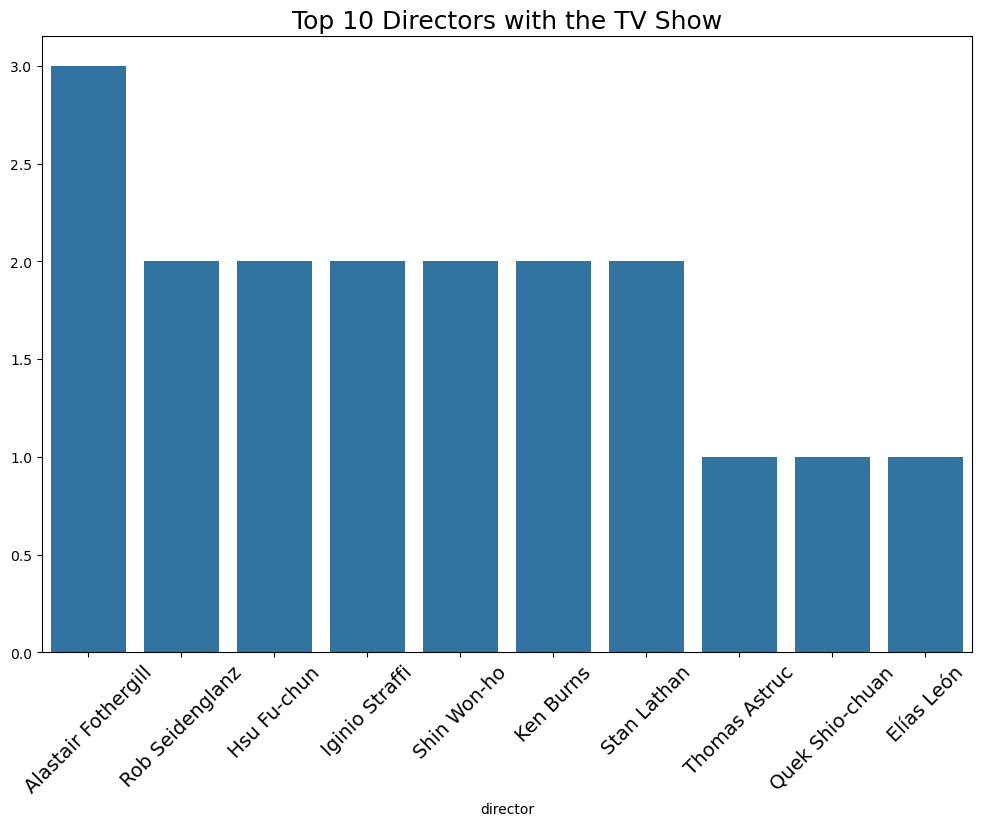

In [21]:
### Top 10 diretores com mais filmes

director_film = df[df["type"] == "TV Show"]["director"].value_counts()[:10]

plt.figure(figsize = (12,8))
sns.barplot(x = director_film.index, y = director_film.values)
plt.xticks(rotation = 45, fontsize = 14)
plt.title("Top 10 Directors with the TV Show",fontsize = 18)
plt.show()

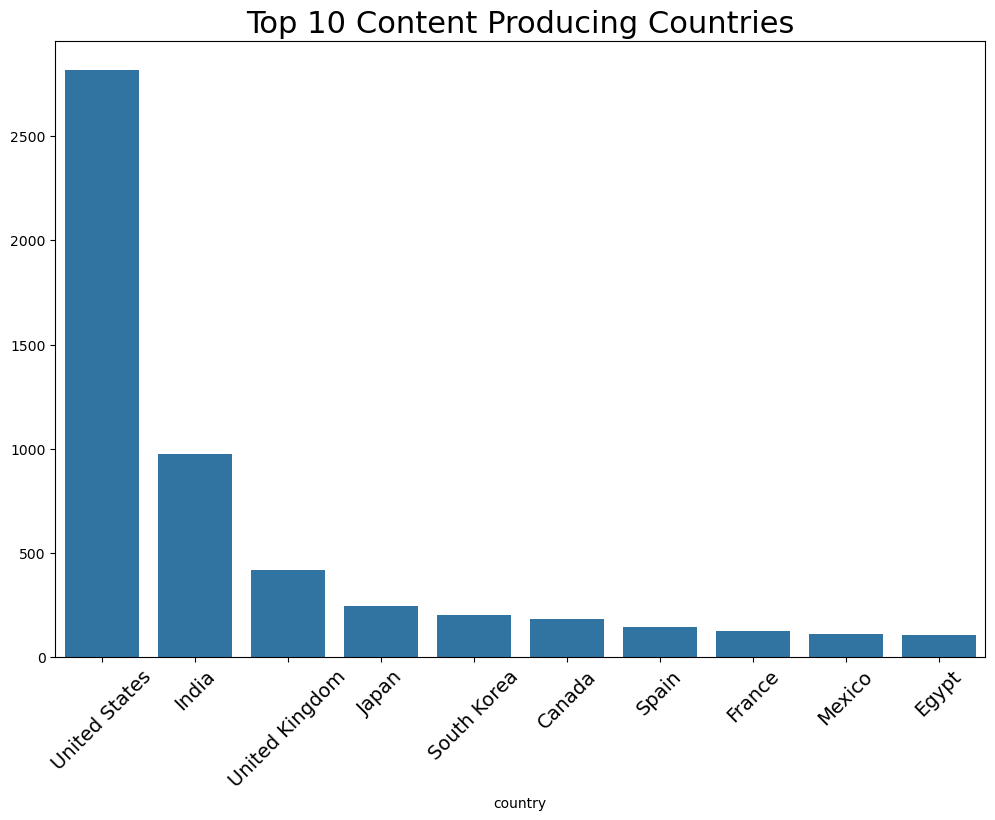

In [31]:
# Top 10 pais com mais producoes
top10_country = df['country'].value_counts().nlargest(10)
plt.figure(figsize = (12,8))
sns.barplot(x = top10_country.index, y = top10_country.values)
plt.title("Top 10 Content Producing Countries", fontsize = 22)
plt.xticks(rotation = 45, fontsize = 14)
plt.show()

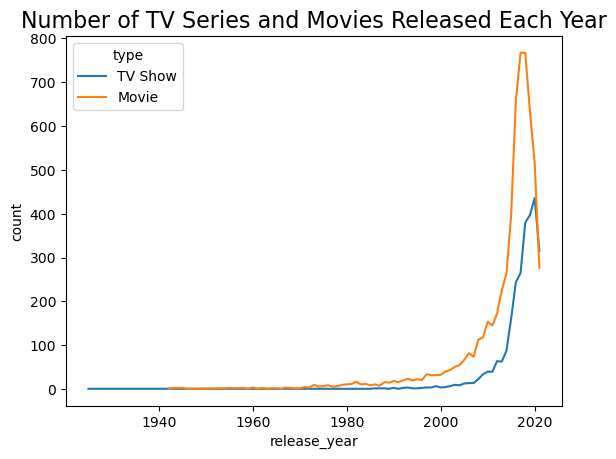

In [49]:
# Distribuicao das producoes por ano (junto e separado por categoria Movie e TV Show)
df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce')
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

release_counts = df.groupby(["release_year", "type"]).size().reset_index(name="count")

sns.lineplot(data=release_counts, x="release_year", y="count", hue="type")
plt.title("Number of TV Series and Movies Released Each Year", fontsize = 16)
plt.show()

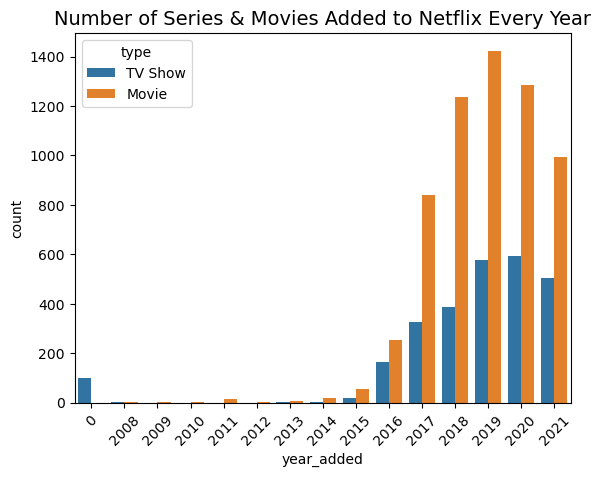

In [51]:
# Numero de producoes adicioadas na netflix ao longo dos anos
df['year_added'] = df['year_added'].fillna(0).astype(int)

content_counts = df.groupby(["year_added", "type"]).size().reset_index(name = "count")

sns.barplot(x = "year_added", y = "count", data = content_counts, hue = "type")
plt.xticks(rotation = 45)
plt.title("Number of Series & Movies Added to Netflix Every Year",fontsize = 14)
plt.show()

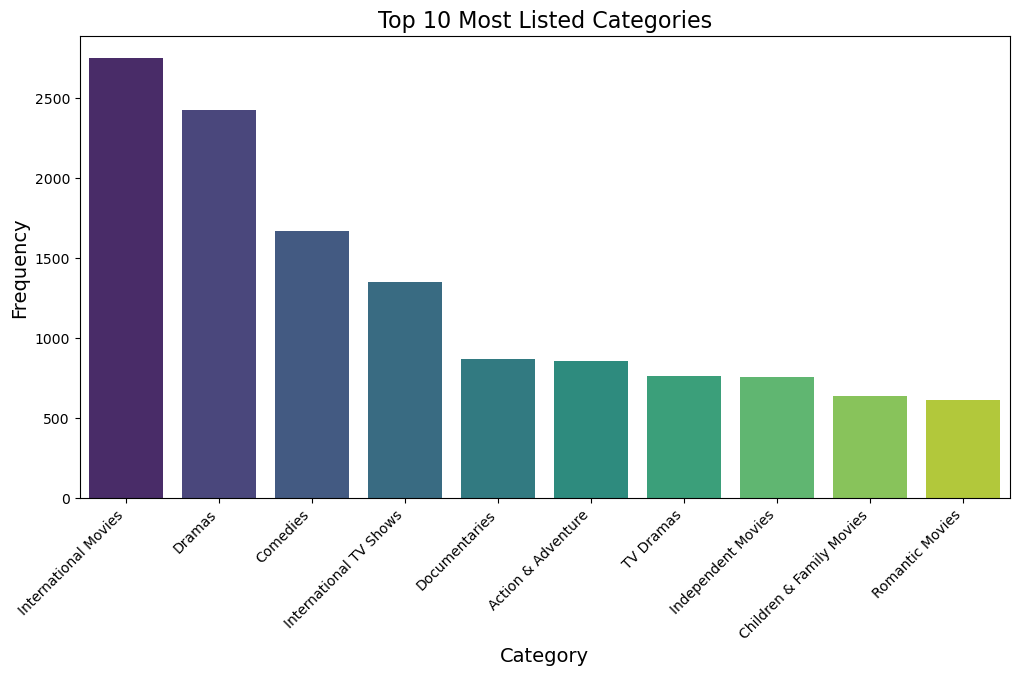

In [55]:
# Top 10 categorias
categories = df['listed_in'].str.split(',').explode().str.strip()  
top_10_categories = categories.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='viridis')

plt.title('Top 10 Most Listed Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()

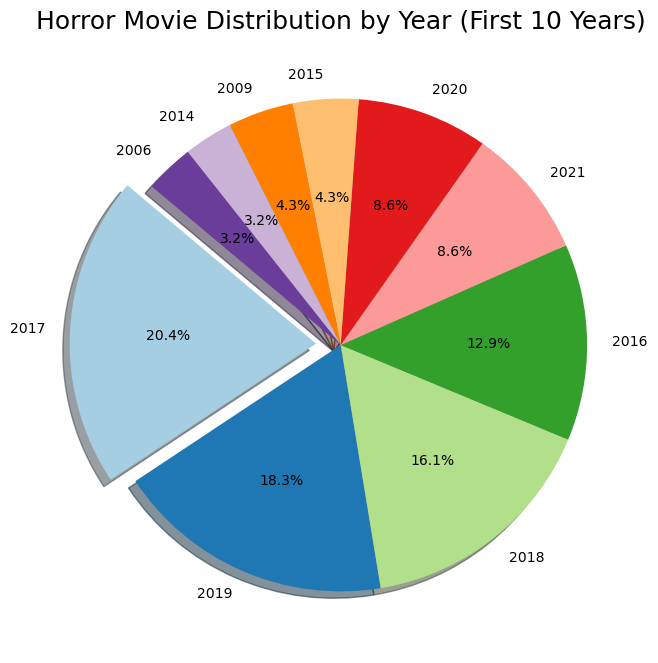

In [63]:
# Distribuicao de filmes de horror por ano (Ultimos 10 anos)
Horror = df[df["listed_in"].isin(["Horror Movies","Thrillers"])]["release_year"].value_counts()
top_10_horror = Horror.sort_values(ascending=False).head(10)

explode = [0.1 if value == top_10_horror.max() else 0 for value in top_10_horror.values]

plt.figure(figsize=(8, 8))
plt.pie(top_10_horror.values, labels=top_10_horror.index, autopct='%1.1f%%', startangle=140, explode=explode, colors=plt.cm.Paired.colors, shadow = 0.6)

plt.title("Horror Movie Distribution by Year (First 10 Years)", fontsize=18)

plt.show()

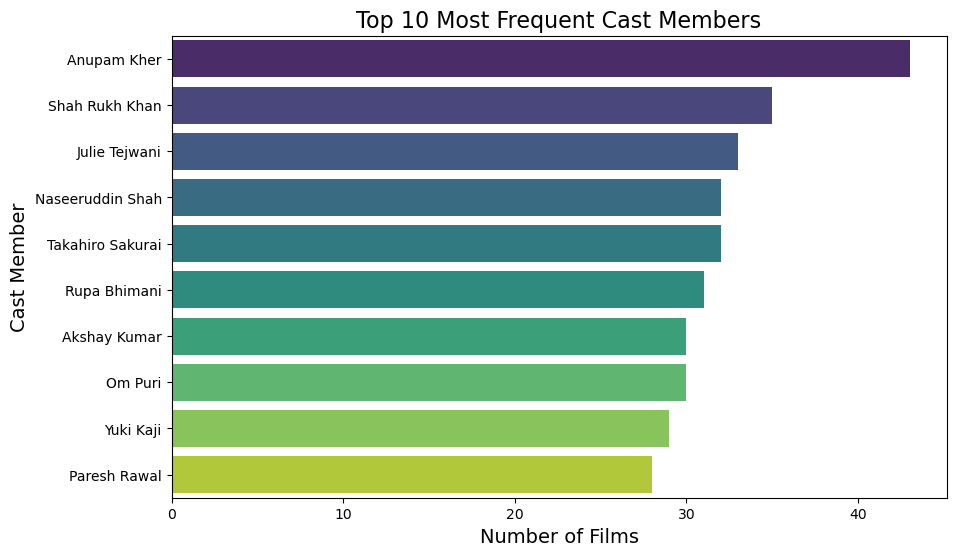

In [123]:
# 0 membros do elenco mais frequentes
all_casts = df['cast'].dropna().str.split(',').explode().str.strip()

cast_counts = all_casts.value_counts()

top_10_casts = cast_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_casts.values, y=top_10_casts.index, palette='viridis')

plt.title('Top 10 Most Frequent Cast Members', fontsize=16)
plt.xlabel('Number of Films', fontsize=14)
plt.ylabel('Cast Member', fontsize=14)


plt.show()

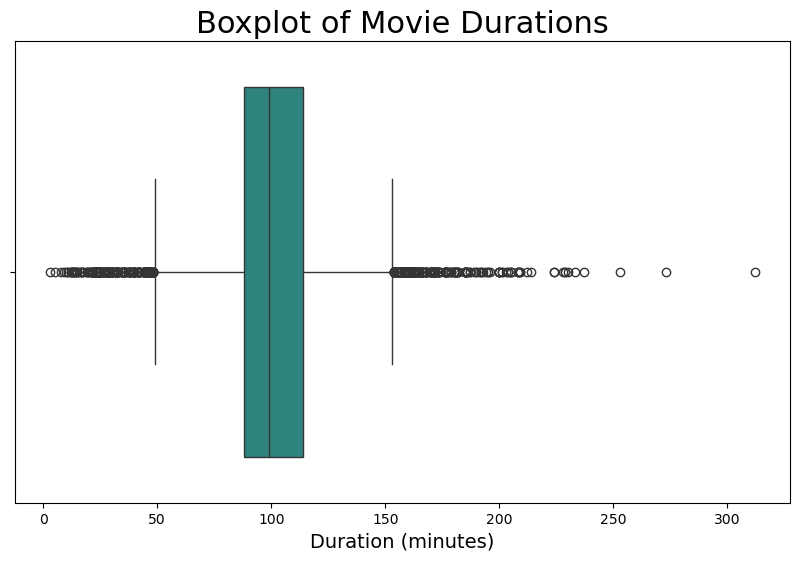

In [127]:
# Filtrar o DataFrame para apenas filmes (type == "Movie") e selecionar as colunas relevantes
new_df = df[df["type"] == "Movie"][["duration", "country"]]

# Remover a string " min" da coluna 'duration' e converter para numérico
new_df['duration'] = new_df['duration'].str.replace(' min', '', regex=False)  # Remove " min"
new_df['duration'] = pd.to_numeric(new_df['duration'], errors='coerce')  # Converte para numérico

# Separar os países que estão listados na coluna 'country' e replicar a duração para cada país
new_df['country'] = new_df['country'].str.split(',')  # Divide os países
new_df = new_df.explode('country')  # Cria uma nova linha para cada país
new_df['country'] = new_df['country'].str.strip()  # Remove espaços extras ao redor dos nomes dos países

# Remover ou preencher valores NaN na coluna 'duration'
new_df = new_df.dropna(subset=['duration'])

# Criar o boxplot para visualização de outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=new_df['duration'], palette='viridis')

# Adicionar título e configurar os rótulos
plt.title('Boxplot of Movie Durations', fontsize=22)
plt.xlabel('Duration (minutes)', fontsize=14)

# Exibir o gráfico
plt.show()


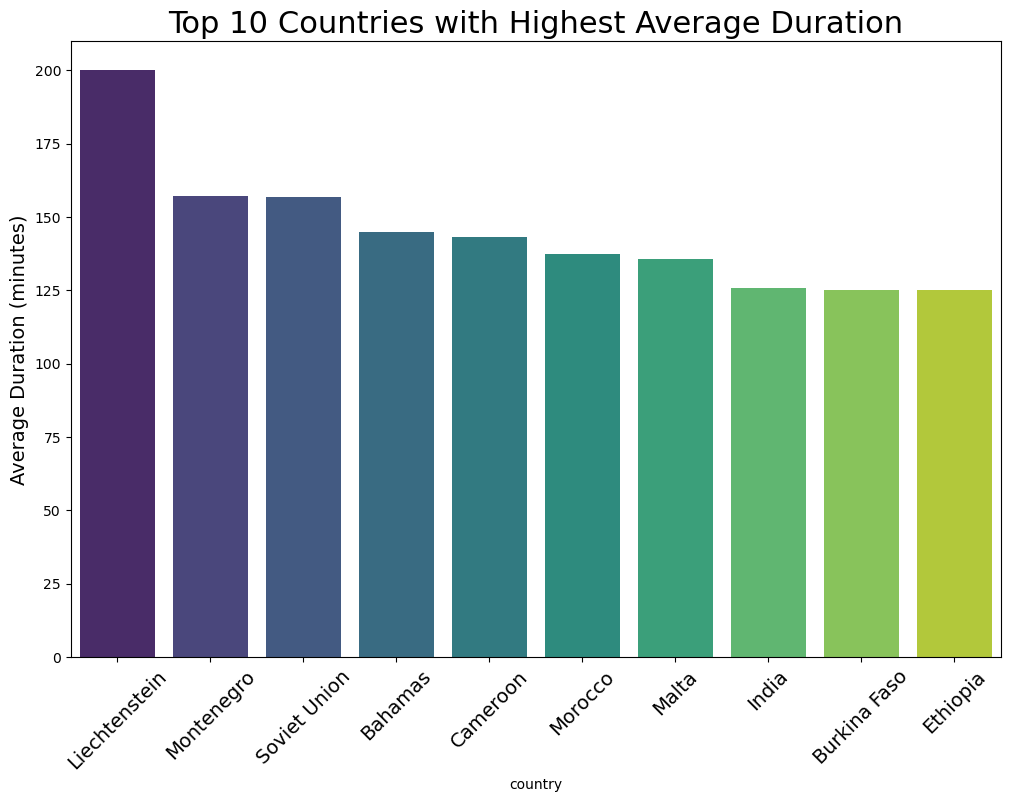

In [129]:


# Calcular a duração média das produções por país e pegar os 10 maiores
top10_avg_duration = new_df.groupby('country')['duration'].mean().nlargest(10)

# Criar o gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=top10_avg_duration.index, y=top10_avg_duration.values, palette='viridis')

# Adicionar título e configurar os rótulos
plt.title('Top 10 Countries with Highest Average Duration', fontsize=22)
plt.xticks(rotation=45, fontsize=14)
plt.ylabel('Average Duration (minutes)', fontsize=14)

# Exibir o gráfico
plt.show()


In [73]:
# Pais com maior rating


In [34]:
# Duracao das producoes com o mais rating

In [35]:
# Modelo para prever se producao vai ser sucesso

In [45]:
# Mapa
import numpy as np

top10_country = {
    'United States': {'count': 2818, 'coords': [37.0902, -95.7129]},
    'India': {'count': 972, 'coords': [20.5937, 78.9629]},
    'United Kingdom': {'count': 419, 'coords': [51.5074, -0.1278]},
    'Japan': {'count': 245, 'coords': [36.2048, 138.2529]},
    'South Korea': {'count': 199, 'coords': [35.9078, 127.7669]},
    'Canada': {'count': 181, 'coords': [56.1304, -106.3468]},
    'Spain': {'count': 145, 'coords': [40.4637, -3.7492]},
    'France': {'count': 124, 'coords': [46.6034, 1.8883]},
    'Mexico': {'count': 110, 'coords': [23.6345, -102.5528]},
    'Egypt': {'count': 106, 'coords': [26.8206, 30.8025]},
    'Turkey': {'count': 105, 'coords': [38.9637, 35.2433]},
    'Nigeria': {'count': 95, 'coords': [9.082, 8.6753]},
    'Australia': {'count': 87, 'coords': [-25.2744, 133.7751]},
    'Taiwan': {'count': 81, 'coords': [23.6978, 120.9605]},
    'Indonesia': {'count': 79, 'coords': [-0.7893, 113.9213]},
    'Brazil': {'count': 77, 'coords': [-14.2350, -51.9253]},
    'Philippines': {'count': 75, 'coords': [12.8797, 121.7740]},
    'United Kingdom, United States': {'count': 75, 'coords': [51.5074, -0.1278]}, 
    'United States, Canada': {'count': 73, 'coords': [56.1304, -106.3468]}, 
    'Germany': {'count': 67, 'coords': [51.1657, 10.4515]},
}


cl = [
    [0.0, 'rgb(248,255,206)'],
    [0.2, 'rgb(203,255,205)'],
    [0.4, 'rgb(155,255,164)'],
    [0.6, 'rgb(79,255,178)'],
    [0.8, 'rgb(15,183,132)'],
    [1, '#008059']
]


m = folium.Map(location=[20, 0], zoom_start=2)


max_count = max([data['count'] for data in top10_country.values()])


for country, data in top10_country.items():
    coords = data['coords']
    count = data['count']
    
    normalized_count = count / max_count  
    
  
    color_idx = int(normalized_count * (len(cl) - 1))
    color = cl[color_idx][1]  
    
    folium.Marker(
        location=coords,
        popup=f'{country}: {count}',
        icon=folium.Icon(color=color, icon="info-sign")
    ).add_to(m)


m.save("top10_countries_map_with_custom_markers.html")
m